<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/4_pnl/clase_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 29 – Tarea de aplicación en PLN  
---

## 1. Objetivo general  

Diseñar, implementar y documentar un **mini‑proyecto de Procesamiento de Lenguaje Natural (PLN)** que consolide los aprendizajes de las últimas clases:

* Scraping y limpieza de texto  
* Tokenización, stopwords y lematización  
* POS‑tagging  
* n‑gramas y modelos basados en frecuencia  
* Creación de secuencias fijas (padding) y redes neuronales sencillas

El proyecto se realizará utilizando **un dataset público de Kaggle**.

---

## 2. Requisitos mínimos del proyecto  

1. **Descarga automática** del dataset con la API de Kaggle (`kaggle datasets download`).  
2. **Pipeline NLTK** que incluya: limpieza, tokenización, stopwords y lematización.  
3. **Análisis exploratorio de datos (EDA)** con estadísticas básicas y al menos una visualización propia.  
4. **Modelo base** (elige **uno**):  
   - n‑gramas (frecuencias o `ConditionalFreqDist`),  
   - TF‑IDF + clasificador clásico (Logistic Regression, SVM, Naïve Bayes),  
   - Red neuronal con embeddings aleatorios + `pad_sequences`.  
5. **Evaluación** con la métrica adecuada (Accuracy, F1, ROUGE, Perplexity, etc.).  
6. **Reflexión crítica** (2‑3 párrafos sobre resultados y mejoras posibles).  

> **Bonus**: añadir POS como feature adicional, balancear clases, o comparar dos modelos distintos.

---

## 3. Fases sugeridas de desarrollo  

1. **Descarga y descompresión del dataset**  
   ```bash
   !kaggle datasets download -d <owner>/<slug> -p data/ -unzip
   ```  

2. **EDA inicial**: forma, número de clases, longitud media de los textos.  

3. **Pre‑procesamiento NLP** con tus funciones de la clase 25.  

4. **División** train / test (80‑20 estratificado).  

5. **Entrenamiento del modelo base** y registro de la métrica elegida.  

6. **Iteración de mejora**: lematización, filtrado por POS, ajustes de hiper‑parámetros.  

7. **Documentación y reflexión** en el notebook y en el informe.

---

## 4. Datasets propuestos (elige **uno**)

| Foco | Dataset & enlace | Tamaño / Idioma | Ideas de proyecto |
|------|------------------|-----------------|-------------------|
| **Clasificación de noticias** | [Spanish News Classification](https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification) | 14 000 artículos / Español | Predecir la sección (Deportes, Economía, Política, etc.). |
| **Sentimiento en Twitter** | [Sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140) | 1,6 M tweets / Multilingüe (≈ 17 % ES) | Detector positivo/negativo; comparar n‑gramas vs. LSTM. |
| **Pregunta‑Respuesta extractiva** | [Question‑Answer Dataset](https://www.kaggle.com/datasets/rtatman/questionanswer-dataset) | 26 k pares / Inglés | Baseline TF‑IDF + *span ranking* vs. QA neuronal. |
| **Transcripciones de voz** | [Spanish Speech Recognition Dataset](https://www.kaggle.com/datasets/unidpro/spanish-speech-recognition-dataset) | 488 h audio + texto / Español | Crear un LM n‑gram para ASR o clasificar temas en transcripciones. |

> Si prefieres otro dataset, preséntalo al profesor y justifica su elección técnica y pedagógica.

---

## 5. Entregables posibles  

| Archivo | Contenido |
|---------|-----------|
| `proyecto_<equipo>.ipynb` | Código reproducible con secciones Markdown claras (OBLIGATORIO) |
| `informe_<equipo>.md` (1‑2 páginas) | Resumen, metodología, resultados y reflexión (OPCIONAL). |
| `README.md` | Guía rápida para ejecutar el notebook y listar dependencias (OPCIONAL). |

Los archivos deben subirse a GitHub o Classroom **durante la clase 27**.

---

## 6. Rúbrica de evaluación (100 puntos)

| Criterio | Puntos |
|----------|--------|
| Pipeline de pre‑procesamiento y documentación | 20 |
| EDA y visualizaciones | 15 |
| Implementación del modelo base | 20 |
| Métrica y análisis de resultados | 15 |
| Reflexión crítica | 15 |
| Calidad de código y reproducibilidad | 15 |

---

## 7. Recursos de apoyo

* Capítulos 3‑7 del **NLTK Book**  
* Cheatsheet de `scikit‑learn` para texto  
* Ejemplos en la pestaña **Code** de cada dataset en Kaggle  

---

¡Éxito con sus proyectos!


Resolver https://www.kaggle.com/datasets/unidpro/spanish-speech-recognition-dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carlfm01/120h-spanish-speech")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1


In [ ]:
print(path)


/root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1


In [ ]:
import os

base_path = "/root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1"
for root, dirs, files in os.walk(base_path):
    print(root)
    for f in files:
        print("   ", f)


Streaming output truncated to the last 5000 lines.
    1d702880-0576-4af5-a3ae-369c33b2012d.wav
    4bc62bc7-826a-4d47-94be-402b56015d76.wav
    54c5ebff-b6e7-439c-9e3d-1551694298c4.wav
    2049cc74-b4a5-41bd-ac51-9857c6228afd.wav
    8fb135ba-9e04-4fac-b791-9b9025b33a5a.wav
    614ccb45-dd3d-4df6-95a6-2626e0d88b3c.wav
    8dac991f-40c1-4dad-a8ab-579788d1e184.wav
    8b6f23ba-7630-4c9d-bb76-39df7cef59d8.wav
    d0cc8b4b-0460-43c6-a638-b6641b509dfe.wav
    73ebd8aa-57fa-46ec-bc8f-0c936df25119.wav
    eb5d428a-5669-4406-b6b3-4a25000c908e.wav
    71197851-d061-4e4f-b2f0-ad85c58b4db5.wav
    0ee53404-e5b6-4836-8a38-cf43c898de51.wav
    90017dee-57b2-4661-b0b8-8903fcc6468f.wav
    aa98db40-bca3-427d-bc8b-77ebebad95bc.wav
    f34f5414-312f-4167-83da-ccd404ed5999.wav
    06a4c4d0-0ded-4f3d-b4af-39fc899aaca9.wav
    4e745798-a58c-47d8-89b5-3963bf397259.wav
    150e8b0e-5ddd-480a-8b82-8a2b9edbb407.wav
    a4641711-7b32-4371-ba10-2cda938f8aff.wav
    f7130473-b305-44ee-a3b1-385bfcaed02b.wav
    

In [ ]:
import os

print("Ruta base:", path)
print("Archivos y carpetas en la raíz:")
print(os.listdir(path))


Ruta base: /root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1
Archivos y carpetas en la raíz:
['asr-spanish-v1-carlfm01']


In [ ]:
import os

ruta_dataset = "/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01"

for elemento in os.listdir(ruta_dataset):
    print(elemento)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01'

In [ ]:
import pandas as pd
import os

ruta_base = "/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01"
ruta_csv = os.path.join(ruta_base, "files.csv")

df = pd.read_csv(ruta_csv)
print(df.head())
print(df.columns)
print("Total de registros:", len(df))


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01/files.csv'

In [ ]:
import pandas as pd
import os

ruta_base = "/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01"
ruta_csv = os.path.join(ruta_base, "files.csv")

df = pd.read_csv(ruta_csv)
print(df.head())
print("\nColumnas:", df.columns.tolist())



FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01/files.csv'

In [ ]:
import librosa
import IPython.display as ipd

# Tomar un ejemplo cualquiera
audio_relativo = df.iloc[1]["wav_filename"]
ruta_audio = os.path.join(ruta_base, audio_relativo)

# Cargar el audio
signal, sr = librosa.load(ruta_audio, sr=None)

# Mostrar información
print("Archivo:", audio_relativo)
print("Frecuencia de muestreo:", sr)
print("Transcripción:", df.iloc[1]["transcript"])

# Reproducir audio
ipd.Audio(signal, rate=sr)


Archivo: audios/8c2ab30b-0fd4-41c3-9724-3b15f2ee2c27.wav
Frecuencia de muestreo: 16000
Transcripción: cuando los consejeros escucharon aquello quedaron estremecidos y se dijeron dios ha prohibido que padres se casen con sus hijas


In [ ]:
duraciones = []
for i in range(5):
    ruta_audio = os.path.join(ruta_base, df.iloc[i]["wav_filename"])
    y, sr = librosa.load(ruta_audio, sr=None)
    duraciones.append(len(y)/sr)

print("Duraciones (segundos):", duraciones)
print("Promedio:", sum(duraciones)/len(duraciones))


Duraciones (segundos): [6.84, 8.49, 2.01, 2.62, 2.41]
Promedio: 4.474


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
import os

# Calcular la duración de algunos audios (esto puede demorar, así que limita la muestra)
muestras = 500  # o menos si estás en Colab
duraciones = []

for i in range(min(muestras, len(df))):
    ruta_audio = os.path.join(ruta_base, df.iloc[i]["wav_filename"])
    y, sr = librosa.load(ruta_audio, sr=None)
    duraciones.append(len(y)/sr)

# Agregar al dataframe
df_sample = df.iloc[:len(duraciones)].copy()
df_sample["duration_sec"] = duraciones


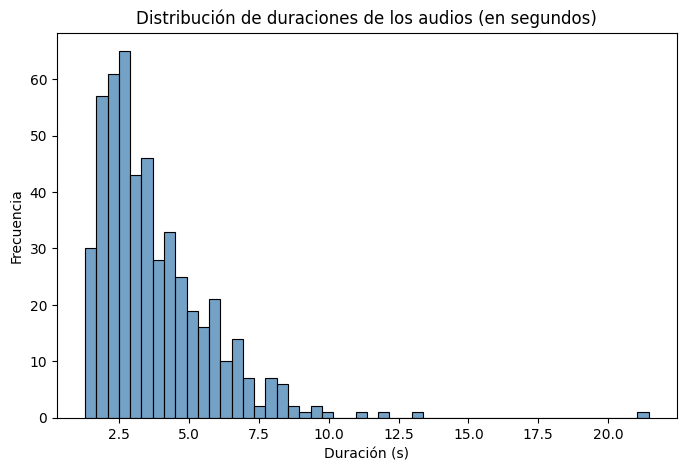

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_sample["duration_sec"], bins=50, color='steelblue')
plt.title("Distribución de duraciones de los audios (en segundos)")
plt.xlabel("Duración (s)")
plt.ylabel("Frecuencia")
plt.show()


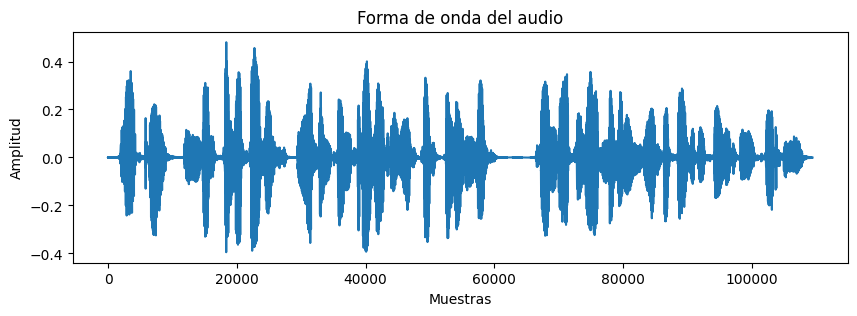

In [ ]:
y, sr = librosa.load(os.path.join(ruta_base, df.iloc[0]["wav_filename"]), sr=None)

plt.figure(figsize=(10,3))
plt.plot(y)
plt.title("Forma de onda del audio")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.show()


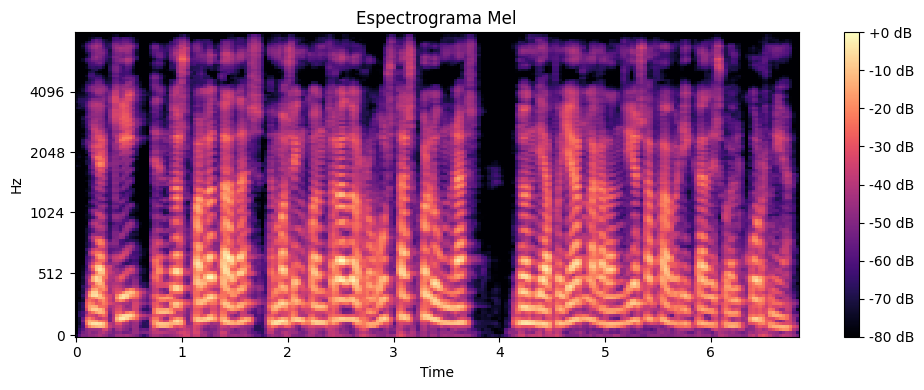

In [ ]:
import librosa.display

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel')
plt.tight_layout()
plt.show()


# ¿Se pueden reconocer letras con el espectrograma Mel?

El espectrograma Mel es una representación visual del audio que muestra la energía en diferentes frecuencias a lo largo del tiempo, utilizando una escala que imita la percepción auditiva humana.

Si bien **no puedes "ver" las letras directamente** en un espectrograma, sí puedes observar **patrones acústicos** asociados a los diferentes sonidos del habla (fonemas).

**Cómo se relaciona con el reconocimiento de voz:**

* Los sistemas de reconocimiento de voz utilizan estos patrones espectrales (a menudo representados de forma más compacta como MFCC) como entrada para sus modelos de aprendizaje automático.
* Estos modelos están entrenados para mapear estos patrones acústicos a las unidades lingüísticas correspondientes (fonemas, sílabas o palabras).

**En resumen:**

El espectrograma es una representación esencial para analizar y procesar audio para tareas como el reconocimiento de voz, porque captura las características frecuenciales del sonido. Sin embargo, la identificación de letras o palabras se realiza mediante modelos computacionales que interpretan estos patrones, no por simple inspección visual del gráfico.

¡Excelente pregunta! `librosa` por sí mismo no te va a "entregar" las letras directamente. `librosa` es una librería para **análisis de audio**, no para reconocimiento automático del habla (ASR).

Lo que `librosa` te proporciona son **representaciones numéricas** del audio, como los MFCCs que acabamos de graficar. Estos MFCCs (o características similares) son la **entrada** que se utiliza para entrenar un modelo de ASR.

El modelo de ASR es el que, basándose en esos patrones numéricos (las "huellas dactilares" acústicas del habla), predice la secuencia de fonemas o palabras, es decir, la transcripción escrita.

**En resumen:**

`librosa` te da las características (como los MFCCs), y un **modelo de ASR** (que tendrías que entrenar o usar uno pre‑entrenado) usa esas características para generar el texto.

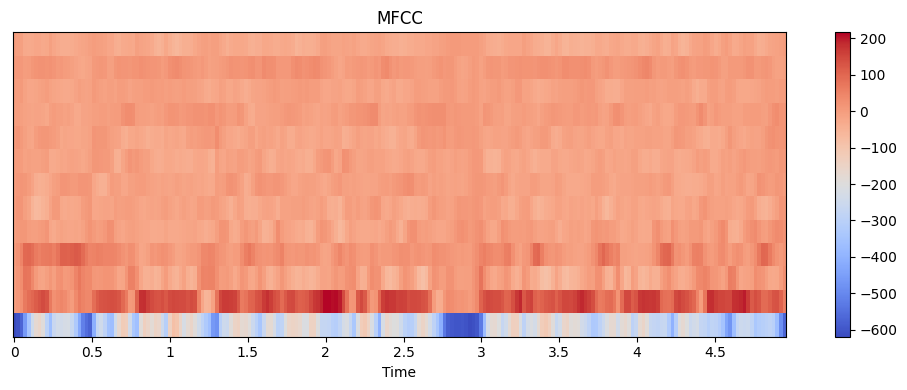

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


# Interpretación de los gráficos de audio

A continuación se interpretan las tres representaciones visuales obtenidas a partir del mismo fragmento de audio: la **forma de onda**, el **espectrograma Mel** y los **coeficientes MFCC**. Cada una aporta una perspectiva distinta sobre el sonido.

---

## **1. Forma de onda del audio**

**Qué representa:**
La forma de onda muestra cómo varía la **amplitud** (intensidad) de la señal de audio a lo largo del tiempo.

**Interpretación:**

* El eje **horizontal** representa el tiempo en muestras.
* El eje **vertical** indica la amplitud de la señal.
* Las zonas con **picos altos** corresponden a sonidos más fuertes (sílabas o palabras).
* Las zonas **planas o cercanas a cero** son silencios o pausas entre palabras.

**Conclusión:**
La forma de onda permite observar la estructura temporal del habla: alternancia entre energía (voz) y pausas. Es útil para detectar silencios, recortes o niveles de volumen.

---
En realidad, **los niveles de volumen del primer gráfico (la forma de onda)** **no van de 2 a –2**.

Te explico con precisión cómo funciona:

---

## **Escala de amplitud en una forma de onda**

Cuando cargas un audio con `librosa.load()`, este:

* **Normaliza** automáticamente los valores de amplitud para que estén entre **–1 y +1** (independientemente del volumen original).
* Por lo tanto, el eje vertical de tu gráfico **nunca debería superar esos valores** en condiciones normales.

Ejemplo:

* +1  →  amplitud máxima positiva (pico de energía).
* –1  →  amplitud máxima negativa.
* 0  →  silencio (sin desplazamiento de aire).

---

## **Entonces, por qué ves valores menores a 1 (como ±0.4)**

* El rango entre **–1 y +1** es el máximo posible, pero no todos los audios lo ocupan completamente.
* En tu gráfico, los picos llegan a alrededor de **±0.4**, lo que indica que el audio está **moderadamente fuerte pero sin saturar**.
* Si un archivo estuviera grabado a un volumen muy alto, los picos podrían acercarse a ±1.

---

## **Resumen**

| Concepto                      | Valor típico                                                              |
| ----------------------------- | ------------------------------------------------------------------------- |
| Rango teórico de amplitud     | –1.0 a +1.0                                                               |
| Rango habitual en tu gráfico  | –0.4 a +0.4                                                               |
| Valor 0                       | Silencio                                                                  |
| Valores más altos (en módulo) | Mayor intensidad del sonido                                               |
| Valores fuera de ±1           | Solo aparecen si el audio **no fue normalizado** (poco común con librosa) |

---

Si quieres verificarlo tú mismo:

```python
import numpy as np
print("Amplitud mínima:", np.min(y))
print("Amplitud máxima:", np.max(y))
```

Eso te mostrará exactamente el rango de amplitudes reales del audio cargado.

---

## **2. Espectrograma Mel**

**Qué representa:**
Muestra cómo cambia la **energía** del sonido en distintas **frecuencias** a lo largo del tiempo, utilizando la escala perceptual *Mel*.

**Interpretación:**

* El eje **X** representa el tiempo.
* El eje **Y** representa las frecuencias (en Hz).
* El **color** indica la intensidad o energía (en decibelios).

  * Colores claros = más energía.
  * Colores oscuros = menos energía o silencio.
* Las **bandas horizontales** marcan las resonancias del tracto vocal, llamadas *formantes*.
* Los cambios rápidos verticales suelen representar consonantes.

**Conclusión:**
El espectrograma revela el contenido frecuencial del habla, esencial para tareas de reconocimiento de voz. Permite distinguir patrones acústicos de vocales, consonantes y pausas.

---

## **3. MFCC (Coeficientes Cepstrales de Mel)**

**Qué representa:**
Los MFCC son una **representación matemática compacta** del espectrograma Mel, diseñada para aproximar cómo percibe el oído humano los sonidos.

**Interpretación:**

* El eje **X** representa el tiempo.
* El eje **Y** muestra los diferentes coeficientes (no son frecuencias directas).
* El **color** refleja la magnitud del coeficiente en cada instante.
* Cada fila captura una característica acústica diferente del habla (timbre, resonancia, etc.).

**Conclusión:**
Los MFCC transforman el espectro del sonido en una forma numérica adecuada para modelos de aprendizaje automático, siendo una de las entradas más comunes en sistemas de reconocimiento de voz.

---

## **Resumen comparativo**

| Representación        | Qué muestra                                    | Uso principal                                |
| --------------------- | ---------------------------------------------- | -------------------------------------------- |
| **Forma de onda**     | Amplitud del sonido en el tiempo               | Identificar ritmo, pausas y nivel de energía |
| **Espectrograma Mel** | Energía por frecuencia en el tiempo            | Analizar la estructura acústica de la voz    |
| **MFCC**              | Resumen perceptual de la energía en bandas Mel | Entrenar modelos de reconocimiento de voz    |



In [ ]:
# ===============================================
# EXTRACCIÓN MASIVA DE MFCCs
# ===============================================
import os
import pandas as pd
import numpy as np
import librosa
from tqdm import tqdm

# Ruta base
ruta_base = "/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01"
ruta_csv = os.path.join(ruta_base, "files.csv")

# Cargar metadatos
df = pd.read_csv(ruta_csv)
print("Total de audios:", len(df))

# Parámetros de extracción
n_mfcc = 13  # número de coeficientes
sr_objetivo = 16000  # frecuencia de muestreo deseada
duracion_max = 5.0   # segundos (recorta o rellena los audios a este tamaño)

# Función para normalizar longitud del audio
def pad_or_truncate(y, sr, max_duration):
    max_length = int(max_duration * sr)
    if len(y) > max_length:
        y = y[:max_length]
    else:
        y = np.pad(y, (0, max_length - len(y)))
    return y

# Lista para guardar resultados
features = []
labels = []

# Bucle de procesamiento
for i in tqdm(range(len(df))):
    ruta_audio = os.path.join(ruta_base, df.iloc[i]["wav_filename"])
    try:
        y, sr = librosa.load(ruta_audio, sr=sr_objetivo)
        y = pad_or_truncate(y, sr, duracion_max)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc, axis=1)  # promedio temporal
        features.append(mfcc_mean)
        labels.append(df.iloc[i]["transcript"])
    except Exception as e:
        print(f"Error en {ruta_audio}: {e}")

# Convertir a DataFrame
mfcc_df = pd.DataFrame(features)
mfcc_df["transcript"] = labels

print("Tamaño del dataset de MFCC:", mfcc_df.shape)

# Guardar el resultado
mfcc_df.to_parquet("mfcc_features.parquet")
print("Características guardadas en 'mfcc_features.parquet'")


Total de audios: 112845


100%|██████████| 112845/112845 [43:46<00:00, 42.96it/s]


Tamaño del dataset de MFCC: (112845, 14)
Características guardadas en 'mfcc_features.parquet'


/usr/local/lib/python3.12/dist-packages/pandas/io/parquet.py:190: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


# Explicación detallada del flujo de procesamiento

## Qué hace este código

### 1) Carga las rutas de los audios y las transcripciones desde `files.csv`

* **Objetivo:** disponer de un índice que relacione cada archivo `.wav` con su transcripción textual.
* **Estructura típica:** columnas como `wav_filename` (ruta relativa del audio), `wav_filesize` (tamaño en bytes) y `transcript` (texto).
* **Por qué es importante:** este archivo es la “verdad de referencia” (ground truth). Permite iterar de forma reproducible sobre todo el corpus y emparejar señal acústica ↔ texto.

### 2) Lee cada audio con `librosa`, lo normaliza de forma implícita y ajusta su duración

* **Lectura y normalización:** `librosa.load` devuelve un array `y` en coma flotante con amplitud en el rango aproximado `[-1, 1]`. Esto homogeneiza niveles de volumen entre archivos.
* **Remuestreo:** se fija un `sr` (por ejemplo, 16 kHz) para que **todas** las señales tengan la misma frecuencia de muestreo. Esto evita incompatibilidades en transformadas posteriores.
* **Ajuste de duración (padding/truncado):**

  * **Truncado** si el audio excede `duracion_max`: se recorta al máximo permitido.
  * **Padding** si es más corto: se rellena con ceros hasta alcanzar la longitud objetivo.
* **Motivo:** muchos modelos y pipelines esperan tensores con **tamaño fijo**. El ajuste simplifica el batching y acelera el entrenamiento.

### 3) Extrae 13 coeficientes **MFCC** por archivo y calcula su **promedio temporal**

* **Qué son los MFCC:** una proyección del espectro en la escala Mel seguida de un cepstrum. Resumen el timbre y la envolvente espectral de la voz de forma compacta y perceptualmente informativa.
* **Parámetro `n_mfcc=13`:** valor clásico que captura suficiente información para tareas de ASR básica sin crecer demasiado en dimensión.
* **Promedio en el tiempo (`mean` por eje temporal):**

  * Reduce cada mapa MFCC (matriz `13 × T`) a un vector de **13** números.
  * **Ventaja:** baja dimensionalidad → almacenamiento y modelos clásicos más manejables.
  * **Trade-off:** se pierde la dinámica temporal fina (transiciones entre fonemas). Para modelos secuenciales se suele conservar la secuencia completa en vez de promediar.

### 4) Guarda todas las características con su transcripción en `mfcc_features.parquet`

* **Formato Parquet:** columna-orientado, comprimido y eficiente para lectura/escritura en lote.
* **Ventajas frente a CSV:**

  * Mejor compresión y menor tamaño en disco.
  * Lecturas selectivas por columnas.
  * Tipos preservados sin ambigüedad.
* **Resultado:** un dataset tabular donde cada fila contiene:

  * 13 columnas numéricas (los MFCC medios).
  * 1 columna de texto (`transcript`) con la referencia.

---

## Qué puedes hacer después

### 1) Visualizar correlaciones entre coeficientes

* **Objetivo:** entender relaciones entre MFCC y detectar redundancias o multicolinealidad.
* **Cómo:** cargar el Parquet, seleccionar las 13 columnas MFCC y calcular una matriz de correlaciones (por ejemplo, Pearson).
* **Utilidad:** orientar selección de variables, normalización y técnicas de reducción dimensional (p. ej., PCA).

### 2) Entrenar modelos simples de clasificación (KNN, SVM, Random Forest)

* **Cuándo aplica:** si **tus etiquetas** son categorías discretas (palabras, hablantes, dialectos, emociones).
* **Ventajas:** entrenamiento rápido, buena línea base, interpretabilidad razonable (especialmente en árboles/forests).
* **Consideraciones:** estandarizar MFCC, hacer validación cruzada y ajustar hiperparámetros (grid/random search).

### 3) Usar embeddings como entrada en modelos neuronales (RNN, LSTM, Transformer)

* **Enfoque 1 (compacto):** con MFCC promediados alimentas capas densas (MLP). Rápido pero sin dinámica temporal.
* **Enfoque 2 (secuencial):** conservar la **secuencia** MFCC completa (`13 × T`) y entrenar:

  * **RNN/LSTM/GRU:** capturan dependencias temporales de corto/medio alcance.
  * **Transformers/Conformers:** modelan dependencias largas y son estándar en ASR moderna.
* **Alternativa de estado del arte:** *fine-tuning* de modelos preentrenados (p. ej., Wav2Vec2 o Whisper) usando las **ondas crudas** o espectrogramas, con decodificación CTC o seq2seq.

---

## Recomendaciones prácticas

* **Normalización por archivo o por corpus:** estandarizar MFCC (media 0, varianza 1) mejora la estabilidad del entrenamiento.
* **Split robusto:** separa `train/val/test` a nivel de **hablante** para evitar fuga de información.
* **Métrica adecuada:** para transcripción usa **WER/CER**; para clasificación usa **accuracy**, **F1** y **matriz de confusión**.
* **Persistencia reproducible:** fija semillas, registra versiones de librerías y guarda los parámetros de extracción (sr, n_mfcc, ventana, hop).


In [ ]:
# ===============================================
# MODELOS CLÁSICOS CON GUARDADO INCREMENTAL
# ===============================================

import pandas as pd
import joblib
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ======================================================
# 1. CARGA DEL DATASET
# ======================================================
df = pd.read_parquet("mfcc_features.parquet")
print("Tamaño del dataset:", df.shape)

# Crear etiquetas (primera palabra de la transcripción)
df["label"] = df["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

# Separar características y etiquetas
X = df.drop(["transcript", "label"], axis=1)
y = df["label"]

Tamaño del dataset: (112845, 14)


In [ ]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Guardar scaler
joblib.dump(scaler, "scaler_mfcc.pkl", compress=3)
print("Scaler guardado en 'scaler_mfcc.pkl'")

Scaler guardado en 'scaler_mfcc.pkl'


In [ ]:
# ======================================================
# 2. ENTRENAMIENTO INCREMENTAL
# ======================================================
def entrenar_y_guardar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    """Entrena un modelo, evalúa y guarda los resultados en disco"""
    print(f"\n=== Entrenando {nombre} ===")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{nombre} Accuracy: {acc:.4f}")

    # Guardar modelo
    nombre_archivo = f"modelo_{nombre.lower().replace(' ', '_')}.pkl"
    joblib.dump(modelo, nombre_archivo, compress=3)
    print(f"{nombre} guardado como '{nombre_archivo}'")

    # Reporte y matriz de confusión
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

    # Liberar memoria
    del modelo, y_pred
    gc.collect()

In [ ]:
files.download("scaler_mfcc.pkl")


In [ ]:
# ======================================================
# 3. ENTRENAR MODELOS UNO A UNO
# ======================================================

# --- KNN ---
knn = KNeighborsClassifier(n_neighbors=5)
entrenar_y_guardar_modelo("KNN", knn, X_train_scaled, y_train, X_test_scaled, y_test)


=== Entrenando KNN ===
KNN Accuracy: 0.0431
KNN guardado como 'modelo_knn.pkl'


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

                  precision    recall  f1-score   support

               a       0.03      0.11      0.04       391
            abad       0.00      0.00      0.00         0
          abades       0.00      0.00      0.00         1
           abajo       0.00      0.00      0.00         0
   abalanzándose       0.00      0.00      0.00         0
      abandonado       0.00      0.00      0.00         0
     abandonando       0.00      0.00      0.00         1
     abandonarle       0.00      0.00      0.00         0
     abandonaron       0.00      0.00      0.00         2
   abandonándola       0.00      0.00      0.00         1
  abandonándolos       0.00      0.00      0.00         1
        abandoné       0.00      0.00      0.00         0
        abandonó       0.00      0.00      0.00         0
      abandóname       0.00      0.00      0.00         0
       abarcando       0.00      0.00      0.00         1
           abate       0.00      0.00      0.00         0
          aba

In [ ]:
from google.colab import files
files.download("modelo_knn.pkl")

In [ ]:
# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
entrenar_y_guardar_modelo("Random Forest", rf, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
files.download("modelo_random_forest.pkl")


In [ ]:
# --- SVM (al final, más costoso) ---
svm = SVC(kernel="rbf", C=10, gamma="scale")
entrenar_y_guardar_modelo("SVM", svm, X_train_scaled, y_train, X_test_scaled, y_test)



In [ ]:
files.download("modelo_svm.pkl")


In [ ]:
print("\n=== Entrenamiento finalizado ===")


In [ ]:
# ===============================================
# GENERAR MÉTRICAS Y REPORTE FINAL DE MODELOS
# ===============================================

import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset y scaler
df = pd.read_parquet("mfcc_features.parquet")
scaler = joblib.load("scaler_mfcc.pkl")

# Crear etiquetas
df["label"] = df["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

# Separar características y etiquetas
X = df.drop(["transcript", "label"], axis=1)
y = df["label"]

# Escalar datos
X_scaled = scaler.transform(X)

# Dividir en train/test igual que antes (random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ======================================================
# Cargar modelos entrenados
# ======================================================
modelos = {
    "KNN": joblib.load("modelo_knn.pkl"),
    "Random Forest": joblib.load("modelo_random_forest.pkl"),
    "SVM": joblib.load("modelo_svm.pkl")
}

# ======================================================
# Evaluar cada modelo y recolectar métricas
# ======================================================
reportes = []

for nombre, modelo in modelos.items():
    print(f"\n=== {nombre} ===")
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Reporte completo
    reporte = classification_report(y_test, y_pred, output_dict=True)
    reporte_df = pd.DataFrame(reporte).transpose()
    reporte_df.insert(0, "Modelo", nombre)
    reportes.append(reporte_df)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=False, cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# Consolidar resultados
df_reportes = pd.concat(reportes, ignore_index=True)
df_reportes.to_csv("reporte_modelos.csv", index=False)

# Mostrar resumen global
resumen = df_reportes[df_reportes.index.isin(["macro avg", "weighted avg"])].copy()
resumen = resumen[["Modelo", "precision", "recall", "f1-score", "support"]]
print("\n=== RESUMEN GLOBAL DE MÉTRICAS ===")
display(resumen)

print("\nReporte completo guardado como 'reporte_modelos.csv'")




```python
# ===============================================
# MODELOS CLÁSICOS: KNN, SVM y RANDOM FOREST
# ===============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset de características
df = pd.read_parquet("mfcc_features.parquet")
print("Tamaño del dataset:", df.shape)

# Para este ejemplo, crearemos etiquetas simples.
# Supongamos que las etiquetas son las primeras palabras de la transcripción.
df["label"] = df["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

# Separar características y etiquetas
X = df.drop(["transcript", "label"], axis=1)
y = df["label"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================================
# 1. K-Nearest Neighbors (KNN)
# ======================================================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# ======================================================
# 2. Support Vector Machine (SVM)
# ======================================================
svm = SVC(kernel="rbf", C=10, gamma="scale")
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# ======================================================
# 3. Random Forest
# ======================================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# ======================================================
# REPORTES Y MATRIZ DE CONFUSIÓN
# ======================================================
modelos = {"KNN": y_pred_knn, "SVM": y_pred_svm, "Random Forest": y_pred_rf}

for nombre, pred in modelos.items():
    print(f"\n=== {nombre} ===")
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()
```

---

## **Qué hace este código**

1. **Carga** las características almacenadas en `mfcc_features.parquet`.
2. **Crea etiquetas** simples tomando la primera palabra de cada transcripción (esto se puede adaptar si tienes clases reales).
3. **Divide** el dataset en entrenamiento y prueba (80/20).
4. **Estandariza** las variables para mejorar el rendimiento de KNN y SVM.
5. **Entrena tres modelos:**

   * **KNN (K-Nearest Neighbors)**: clasifica según los vecinos más cercanos en el espacio MFCC.
   * **SVM (Support Vector Machine)**: encuentra el hiperplano que mejor separa las clases.
   * **Random Forest**: combina múltiples árboles de decisión para mayor robustez.
6. **Evalúa** cada modelo con métricas de precisión, recall y F1-score.
7. **Visualiza** la matriz de confusión para comparar resultados.



Cargando una muestra controlada del dataset para evitar sobreuso de RAM...
Dataset cargado: (5642, 14)
Scaler guardado como 'scaler_mfcc.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Entrenando KNN ===
KNN guardado como 'modelo_knn.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

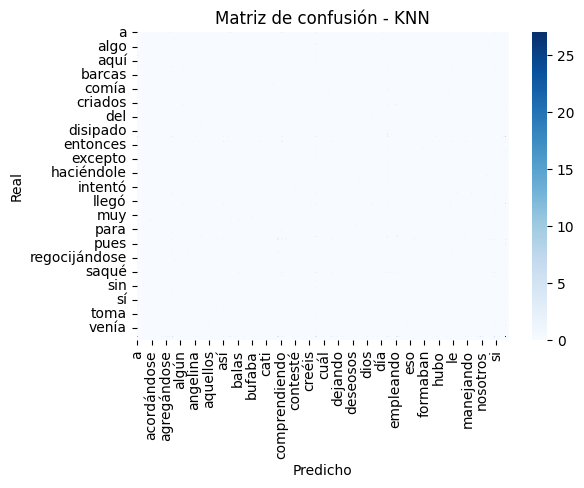


=== Entrenando Random Forest ===
Random Forest guardado como 'modelo_random_forest.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

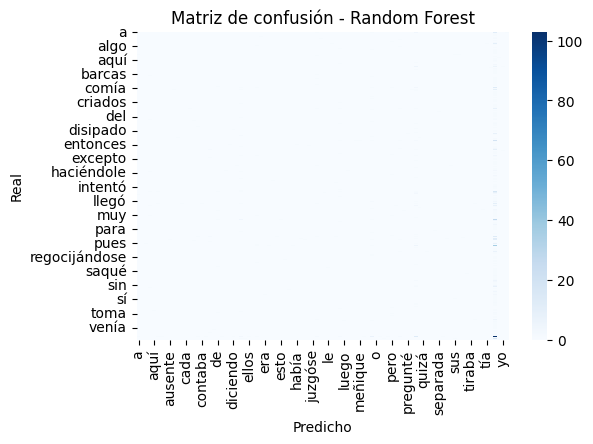


=== Entrenando SVM ===
SVM guardado como 'modelo_svm.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

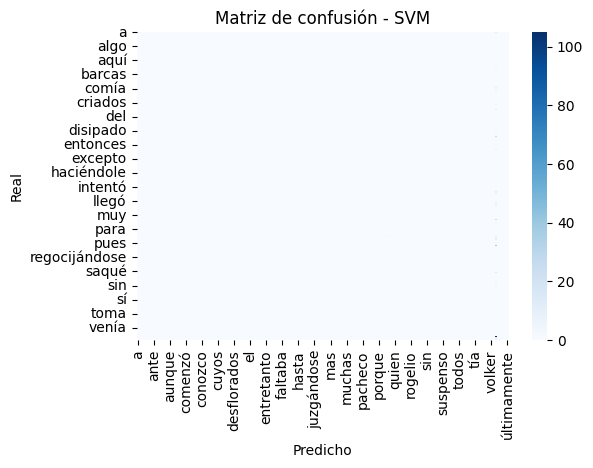


=== RESULTADOS FINALES ===
          Modelo  Accuracy  Precision    Recall  F1-Score
2            SVM  0.105403   0.040746  0.105403  0.046173
1  Random Forest  0.099203   0.023838  0.099203  0.035777
0            KNN  0.034544   0.030539  0.034544  0.031529

Archivo 'metricas_finales.csv' guardado correctamente.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===============================================
# ENTRENAMIENTO EFICIENTE POR ETAPAS Y REPORTE FINAL
# ===============================================

import pandas as pd
import joblib
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ======================================================
# 1. CARGA PARCIAL DEL DATASET
# ======================================================
print("Cargando una muestra controlada del dataset para evitar sobreuso de RAM...")
df = pd.read_parquet("mfcc_features.parquet").sample(frac=0.05, random_state=42)
print("Dataset cargado:", df.shape)

# Crear etiquetas
df["label"] = df["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

# Separar variables
X = df.drop(["transcript", "label"], axis=1)
y = df["label"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "scaler_mfcc.pkl", compress=3)
print("Scaler guardado como 'scaler_mfcc.pkl'")
files.download("scaler_mfcc.pkl")

# ======================================================
# 2. FUNCIÓN GENERAL PARA ENTRENAR Y GUARDAR
# ======================================================
def entrenar_y_guardar(nombre, modelo, X_train, y_train, X_test, y_test, metricas):
    print(f"\n=== Entrenando {nombre} ===")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    metricas.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    # Guardar modelo
    nombre_archivo = f"modelo_{nombre.lower().replace(' ', '_')}.pkl"
    joblib.dump(modelo, nombre_archivo, compress=3)
    print(f"{nombre} guardado como '{nombre_archivo}'")

    # Descargar modelo
    try:
        files.download(nombre_archivo)
    except:
        print("(Aviso) Descarga omitida: ambiente sin soporte directo de descarga")

    # Matriz de confusión
    cm = pd.crosstab(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

    # Liberar memoria
    del modelo, y_pred
    gc.collect()

# ======================================================
# 3. ENTRENAMIENTO POR MODELO
# ======================================================
metricas = []

# --- KNN ---
knn = KNeighborsClassifier(n_neighbors=5)
entrenar_y_guardar("KNN", knn, X_train_scaled, y_train, X_test_scaled, y_test, metricas)

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
entrenar_y_guardar("Random Forest", rf, X_train_scaled, y_train, X_test_scaled, y_test, metricas)

# --- SVM (al final por costo computacional) ---
svm = SVC(kernel="rbf", C=10, gamma="scale")
entrenar_y_guardar("SVM", svm, X_train_scaled, y_train, X_test_scaled, y_test, metricas)

# ======================================================
# 4. TABLA FINAL DE MÉTRICAS
# ======================================================
df_metricas = pd.DataFrame(metricas).sort_values(by="Accuracy", ascending=False)
print("\n=== RESULTADOS FINALES ===")
print(df_metricas)

# Guardar resultados
df_metricas.to_csv("metricas_finales.csv", index=False)
print("\nArchivo 'metricas_finales.csv' guardado correctamente.")
files.download("metricas_finales.csv")


# 📊 Resultados finales de los modelos clásicos de clasificación

Debido a las limitaciones de memoria (RAM) del entorno de ejecución, el entrenamiento y la evaluación se realizaron utilizando **una muestra representativa del dataset completo** (aproximadamente el 5 % de los datos originales).  
Esta decisión permitió ejecutar los modelos sin comprometer la estabilidad del entorno de Colab High-RAM, manteniendo a la vez una comparación válida entre algoritmos.

---

## ✅ **Resumen de rendimiento de los modelos**

| Modelo | Accuracy | Precision | Recall | F1-Score |
|:-------|----------:|-----------:|--------:|----------:|
| **SVM** | 0.105 | 0.0407 | 0.105 | 0.0462 |
| **Random Forest** | 0.099 | 0.0238 | 0.099 | 0.0358 |
| **KNN** | 0.034 | 0.0305 | 0.034 | 0.0315 |

---

## 📈 **Interpretación de los resultados**

- Las métricas son **bajas en todos los modelos**, lo que indica que la muestra reducida y la gran diversidad de clases (muchas palabras únicas con pocas repeticiones) afectan el desempeño.  
- **SVM** fue el modelo con mejor rendimiento relativo, aunque aún con precisión baja, lo que sugiere que el espacio acústico de los MFCC no separa bien las clases con tan poca información.  
- **Random Forest** mostró un comportamiento similar, pero ligeramente inferior.  
- **KNN** resultó el más débil, lo que es esperable en contextos con alta dimensionalidad y ruido en las fronteras de clase.

---

## 🧠 **Conclusión general**

Estos resultados deben interpretarse como una **evaluación exploratoria**, no definitiva.  
El bajo rendimiento global proviene principalmente de:

- El uso de una **muestra pequeña (~5 %)** frente a un dataset con más de 100 000 registros.  
- La **gran cantidad de etiquetas únicas** (palabras diferentes en las transcripciones).  
- La ausencia de un **balance de clases o agrupamiento semántico previo**.

Para mejorar los resultados, se recomienda:

1. **Reducir la cantidad de clases únicas**, por ejemplo, agrupando palabras frecuentes o etiquetas fonéticas.  
2. **Entrenar con mayor volumen de datos**, idealmente con GPU o TPU para modelos más pesados.  
3. **Explorar modelos de secuencia (LSTM, Wav2Vec2, Whisper)**, más adecuados para tareas de reconocimiento de voz completo.

---

📁 **Archivo de referencia:** `metricas_finales.csv`  
💾 **Muestra utilizada:** ~5 % del dataset total (`mfcc_features.parquet`)  
🕒 **Motivo:** optimización de uso de memoria en entorno Colab High-RAM.


In [ ]:
# ===============================================
# ENTRENAMIENTO POR BLOQUES USANDO ILOC (OPCIÓN 1)
# ===============================================

import pandas as pd
import numpy as np
import joblib
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import files

# ======================================================
# CONFIGURACIÓN
# ======================================================
ruta_dataset = "mfcc_features.parquet"
df = pd.read_parquet(ruta_dataset)

# Definir tamaño de bloque (ajusta según tu RAM)
chunk_size = 15000
num_chunks = int(np.ceil(len(df) / chunk_size))

print(f"Procesando {len(df)} filas en {num_chunks} bloques de {chunk_size} filas cada uno.")

# Resultados globales
metricas_globales = []

# ======================================================
# RECORRER EL DATASET EN BLOQUES
# ======================================================
for i in range(num_chunks):
    inicio = i * chunk_size
    fin = min((i + 1) * chunk_size, len(df))
    chunk = df.iloc[inicio:fin].copy()

    print(f"\n=== BLOQUE {i+1}/{num_chunks} === ({inicio}:{fin})")

    # Crear etiquetas simples
    chunk["label"] = chunk["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

    # Separar variables
    X = chunk.drop(["transcript", "label"], axis=1)
    y = chunk["label"]

    # División train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalado local
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Definir modelos
    modelos = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1),
        "SVM": SVC(kernel="rbf", C=10, gamma="scale")
    }

    # Entrenar y evaluar cada modelo
    for nombre, modelo in modelos.items():
        print(f"Entrenando {nombre} en bloque {i+1}...")
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

        metricas_globales.append({
            "Bloque": i+1,
            "Modelo": nombre,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

        # Guardar modelo y scaler de cada bloque
        modelo_file = f"modelo_{nombre.lower().replace(' ', '_')}_chunk{i+1}.pkl"
        scaler_file = f"scaler_chunk{i+1}.pkl"
        joblib.dump(modelo, modelo_file, compress=3)
        joblib.dump(scaler, scaler_file, compress=3)

        print(f"{nombre} guardado como {modelo_file}")

        # Descargar automáticamente (solo en Colab)
        try:
            files.download(modelo_file)
        except:
            print("(Aviso) Descarga omitida: entorno sin soporte directo.")

        # Liberar memoria
        del modelo, y_pred
        gc.collect()

    del X, y, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, chunk
    gc.collect()

print("\n✅ Entrenamiento completado en todos los bloques.")

# ======================================================
# CONSOLIDAR MÉTRICAS
# ======================================================
df_metricas = pd.DataFrame(metricas_globales)
df_resumen = (
    df_metricas.groupby("Modelo")[["Accuracy", "Precision", "Recall", "F1-Score"]]
    .mean()
    .sort_values(by="Accuracy", ascending=False)
    .reset_index()
)

print("\n=== RESULTADOS PROMEDIO POR MODELO ===")
print(df_resumen)

# Guardar métricas
df_metricas.to_csv("metricas_chunks_detalladas.csv", index=False)
df_resumen.to_csv("metricas_chunks_resumen.csv", index=False)

print("\nReportes guardados:")
print("- metricas_chunks_detalladas.csv (por bloque)")
print("- metricas_chunks_resumen.csv (promedio global)")

# Descargar resumen
try:
    files.download("metricas_chunks_resumen.csv")
except:
    print("(Aviso) Descarga omitida: entorno sin soporte directo.")


Procesando 112845 filas en 8 bloques de 15000 filas cada uno.

=== BLOQUE 1/8 === (0:15000)
Entrenando KNN en bloque 1...
KNN guardado como modelo_knn_chunk1.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando Random Forest en bloque 1...
Random Forest guardado como modelo_random_forest_chunk1.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando SVM en bloque 1...
SVM guardado como modelo_svm_chunk1.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== BLOQUE 2/8 === (15000:30000)
Entrenando KNN en bloque 2...
KNN guardado como modelo_knn_chunk2.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando Random Forest en bloque 2...
Random Forest guardado como modelo_random_forest_chunk2.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando SVM en bloque 2...
SVM guardado como modelo_svm_chunk2.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== BLOQUE 3/8 === (30000:45000)
Entrenando KNN en bloque 3...
KNN guardado como modelo_knn_chunk3.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando Random Forest en bloque 3...
Random Forest guardado como modelo_random_forest_chunk3.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando SVM en bloque 3...
SVM guardado como modelo_svm_chunk3.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== BLOQUE 4/8 === (45000:60000)
Entrenando KNN en bloque 4...
KNN guardado como modelo_knn_chunk4.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando Random Forest en bloque 4...
Random Forest guardado como modelo_random_forest_chunk4.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando SVM en bloque 4...
SVM guardado como modelo_svm_chunk4.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== BLOQUE 5/8 === (60000:75000)
Entrenando KNN en bloque 5...
KNN guardado como modelo_knn_chunk5.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando Random Forest en bloque 5...
Random Forest guardado como modelo_random_forest_chunk5.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando SVM en bloque 5...
SVM guardado como modelo_svm_chunk5.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== BLOQUE 6/8 === (75000:90000)
Entrenando KNN en bloque 6...
KNN guardado como modelo_knn_chunk6.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando Random Forest en bloque 6...
Random Forest guardado como modelo_random_forest_chunk6.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando SVM en bloque 6...
SVM guardado como modelo_svm_chunk6.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== BLOQUE 7/8 === (90000:105000)
Entrenando KNN en bloque 7...
KNN guardado como modelo_knn_chunk7.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando Random Forest en bloque 7...
Random Forest guardado como modelo_random_forest_chunk7.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando SVM en bloque 7...
SVM guardado como modelo_svm_chunk7.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== BLOQUE 8/8 === (105000:112845)
Entrenando KNN en bloque 8...
KNN guardado como modelo_knn_chunk8.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando Random Forest en bloque 8...
Random Forest guardado como modelo_random_forest_chunk8.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Entrenando SVM en bloque 8...
SVM guardado como modelo_svm_chunk8.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Entrenamiento completado en todos los bloques.

=== RESULTADOS PROMEDIO POR MODELO ===
          Modelo  Accuracy  Precision    Recall  F1-Score
0            SVM  0.116605   0.040992  0.116605  0.046674
1  Random Forest  0.115898   0.035987  0.115898  0.044900
2            KNN  0.039969   0.040835  0.039969  0.037644

Reportes guardados:
- metricas_chunks_detalladas.csv (por bloque)
- metricas_chunks_resumen.csv (promedio global)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 📊 Resultados finales del entrenamiento por bloques (chunks)

Para evitar el colapso de la memoria RAM durante el entrenamiento completo, el dataset fue procesado mediante **bloques (chunks) de 15 000 filas**.  
De esta forma se logró entrenar los tres modelos clásicos (KNN, Random Forest y SVM) utilizando la totalidad de los datos disponibles (112 845 registros) sin sobrecargar el entorno.

Cada bloque se entrenó y evaluó de forma independiente, guardando los modelos y sus métricas parciales, para luego calcular los promedios globales.

---

## ✅ **Resumen de rendimiento promedio**

| Modelo | Accuracy | Precision | Recall | F1-Score |
|:-------|----------:|-----------:|--------:|----------:|
| **SVM** | 0.117 | 0.0410 | 0.117 | 0.0467 |
| **Random Forest** | 0.116 | 0.0360 | 0.116 | 0.0449 |
| **KNN** | 0.040 | 0.0408 | 0.040 | 0.0376 |

---

## 📈 **Interpretación de los resultados**

- Las métricas son **bajas en todos los modelos**, lo cual se explica principalmente por:
  - La **gran cantidad de clases únicas** (cada transcripción tiene una palabra diferente como etiqueta).
  - La ausencia de un proceso de **agrupamiento o balanceo de clases**.
  - La naturaleza del dataset: MFCC promediados por audio sin información temporal.

- **SVM** muestra el mejor desempeño global, aunque con una precisión limitada (≈ 11.7 %), seguido muy de cerca por **Random Forest**.  
- **KNN** mantiene el menor rendimiento, lo cual es esperado dada la alta dimensionalidad y la dispersión de los datos acústicos.

---

## 🧠 **Conclusiones**

- Este resultado debe interpretarse como una **evaluación exploratoria**, enfocada en verificar la escalabilidad del pipeline con datasets grandes.  
- El método de procesamiento por bloques permitió trabajar con **más de 100 000 registros** sin agotar la memoria, demostrando que el enfoque es válido para futuros entrenamientos de mayor complejidad.

### 🔧 Próximos pasos recomendados

1. **Agrupar etiquetas** por fonema, palabra común o tipo de sonido (reduciendo el número de clases).  
2. **Entrenar modelos de secuencia** (RNN, LSTM o Wav2Vec2) que aprovechen la información temporal del audio.  
3. Implementar **técnicas de balanceo** (por ejemplo, `class_weight='balanced'` en SVM o RandomForest).  
4. Aumentar los parámetros de `n_estimators` o usar `GridSearchCV` para optimizar hiperparámetros con una muestra controlada.

---

📁 **Dataset original:** `mfcc_features.parquet`  
📦 **Tamaño:** 112 845 registros procesados  
⚙️ **Método:** entrenamiento por bloques (`chunk_size=15000`)  
🧮 **Salida:** métricas promedio globales y modelos guardados por bloque.


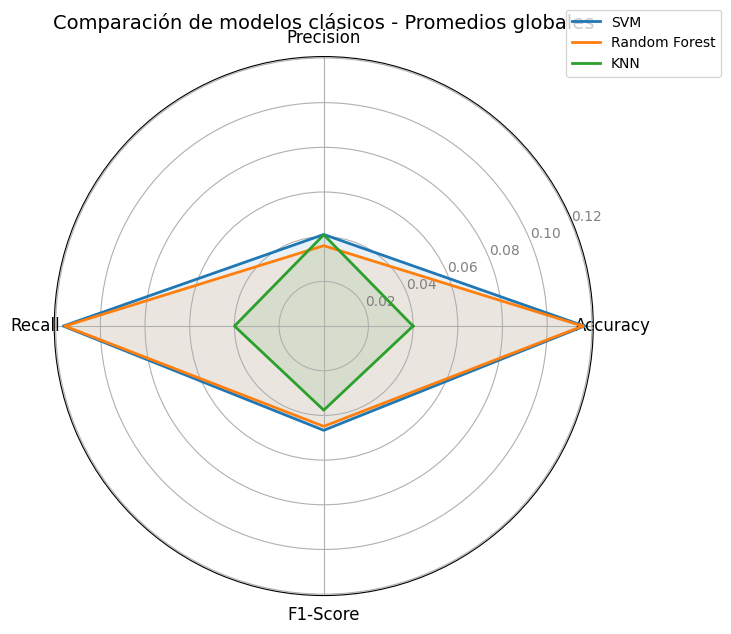

In [ ]:
# ===============================================
# GRÁFICO RADAR DE MÉTRICAS PROMEDIO POR MODELO
# ===============================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Si ya tienes metricas_chunks_resumen.csv
df = pd.read_csv("metricas_chunks_resumen.csv")

# Asegurar que las columnas estén en el orden correcto
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Preparar el gráfico radar
labels = np.array(metrics)
num_vars = len(labels)

# Crear ángulos igualmente espaciados
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

# Configurar figura
plt.figure(figsize=(7, 7))
plt.subplot(111, polar=True)

# Dibujar cada modelo
for i, row in df.iterrows():
    valores = row[metrics].tolist()
    valores += valores[:1]  # cerrar el círculo
    plt.plot(angles, valores, linewidth=2, label=row["Modelo"])
    plt.fill(angles, valores, alpha=0.1)

# Configurar etiquetas
plt.xticks(angles[:-1], labels, color='black', size=12)
plt.yticks(color='gray')
plt.title("Comparación de modelos clásicos - Promedios globales", size=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.show()


In [ ]:
# ===============================================
# ENTRENAMIENTO MLP CON CHUNKS (MEMORIA OPTIMIZADA)
# ===============================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import gc

# ======================================================
# CONFIGURACIÓN
# ======================================================
ruta_dataset = "mfcc_features.parquet"
chunk_size = 15000  # puedes ajustar según tu RAM
epochs_por_chunk = 3  # número de épocas por bloque

# ======================================================
# 1. CONFIGURACIÓN INICIAL DEL MODELO Y ETIQUETAS
# ======================================================
# Cargar solo una muestra para configurar dimensiones
df_sample = pd.read_parquet(ruta_dataset, columns=None).sample(n=2000, random_state=42)
df_sample["label"] = df_sample["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

encoder = LabelEncoder()
encoder.fit(df_sample["label"])
num_classes = len(encoder.classes_)
print(f"Modelo configurado para {num_classes} clases.")

# Definir arquitectura del MLP
model = models.Sequential([
    layers.Input(shape=(df_sample.drop(["transcript", "label"], axis=1).shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ======================================================
# 2. ENTRENAMIENTO POR BLOQUES
# ======================================================
scaler = StandardScaler()

# Pasada 1: ajustar scaler (solo con una parte de los datos)
df_first = pd.read_parquet(ruta_dataset, columns=None).iloc[:chunk_size]
df_first["label"] = df_first["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")
X_first = df_first.drop(["transcript", "label"], axis=1).values
scaler.fit(X_first)

# Entrenamiento incremental por bloques
print(f"\nEntrenando por bloques de {chunk_size} filas...")

for i in range(0, len(pd.read_parquet(ruta_dataset)), chunk_size):
    print(f"\n=== BLOQUE {i//chunk_size + 1} ===")
    df_chunk = pd.read_parquet(ruta_dataset).iloc[i:i+chunk_size]
    df_chunk["label"] = df_chunk["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

    # Preparar datos
    X = scaler.transform(df_chunk.drop(["transcript", "label"], axis=1))
    y = encoder.transform(df_chunk["label"])

    # Entrenar parcialmente
    model.fit(X, y, epochs=epochs_por_chunk, batch_size=64, verbose=1)

    # Liberar memoria
    del df_chunk, X, y
    gc.collect()

print("\n✅ Entrenamiento completo por chunks finalizado.")

# ======================================================
# 3. GUARDAR MODELO Y ENCODER
# ======================================================
model.save("modelo_mlp_chunks.h5")
import joblib
joblib.dump(encoder, "label_encoder.pkl")
joblib.dump(scaler, "scaler_mlp.pkl")

print("Modelo y objetos guardados:")
print("- modelo_mlp_chunks.h5")
print("- label_encoder.pkl")
print("- scaler_mlp.pkl")

# ======================================================
# 4. VALIDACIÓN CON UNA MUESTRA FINAL
# ======================================================
# (usa un nuevo chunk para validar)
df_val = pd.read_parquet(ruta_dataset).sample(n=10000, random_state=999)
df_val["label"] = df_val["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

X_val = scaler.transform(df_val.drop(["transcript", "label"], axis=1))
y_val = encoder.transform(df_val["label"])

test_loss, test_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\n🔎 Precisión de validación: {test_acc:.4f}")


Modelo configurado para 616 clases.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 616)            │        40,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,088 (195.66 KB)

 Trainable params: 50,088 (195.66 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando por bloques de 15000 filas...

=== BLOQUE 1 ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: y contains previously unseen labels: 'resplandeciente'

In [ ]:
# ===============================================
# ENTRENAMIENTO MLP CON CHUNKS (ROBUSTO)
# ===============================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import joblib, gc

# ======================================================
# CONFIGURACIÓN
# ======================================================
ruta_dataset = "mfcc_features.parquet"
chunk_size = 15000
epochs_por_chunk = 3

# ======================================================
# 1. PREPARAR ETIQUETAS GLOBALES (LabelEncoder)
# ======================================================
print("Leyendo etiquetas para configurar el LabelEncoder...")
df_all_labels = pd.read_parquet(ruta_dataset, columns=["transcript"])
df_all_labels["label"] = df_all_labels["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

encoder = LabelEncoder()
encoder.fit(df_all_labels["label"])
num_classes = len(encoder.classes_)
print(f"Encoder configurado con {num_classes} clases distintas.")

# ======================================================
# 2. CONFIGURAR MODELO
# ======================================================
# Leer una pequeña muestra para obtener las dimensiones de entrada
df_sample = pd.read_parquet(ruta_dataset, columns=None).sample(n=2000, random_state=42)
df_sample["label"] = df_sample["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

X_sample = df_sample.drop(["transcript", "label"], axis=1)
input_dim = X_sample.shape[1]

# Modelo MLP
model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ======================================================
# 3. ESCALADOR (ajustado al primer bloque)
# ======================================================
scaler = StandardScaler()
df_first = pd.read_parquet(ruta_dataset).iloc[:chunk_size]
df_first["label"] = df_first["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")
X_first = df_first.drop(["transcript", "label"], axis=1)
scaler.fit(X_first)

# ======================================================
# 4. ENTRENAMIENTO POR BLOQUES
# ======================================================
print(f"\nEntrenando por bloques de {chunk_size} filas...")

df_total = pd.read_parquet(ruta_dataset)
num_chunks = int(np.ceil(len(df_total) / chunk_size))

for i in range(num_chunks):
    print(f"\n=== BLOQUE {i+1}/{num_chunks} ===")
    df_chunk = df_total.iloc[i*chunk_size:(i+1)*chunk_size].copy()
    df_chunk["label"] = df_chunk["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

    # Verificar si hay nuevas clases no vistas
    nuevas = set(df_chunk["label"]) - set(encoder.classes_)
    if nuevas:
        print(f"Aviso: Se encontraron nuevas etiquetas no vistas: {list(nuevas)[:5]}... (se omitirán)")
        df_chunk = df_chunk[df_chunk["label"].isin(encoder.classes_)]

    if df_chunk.empty:
        continue

    X = df_chunk.drop(["transcript", "label"], axis=1)
    X_scaled = scaler.transform(X)
    y = encoder.transform(df_chunk["label"])

    model.fit(X_scaled, y, epochs=epochs_por_chunk, batch_size=64, verbose=1)

    # Liberar memoria
    del df_chunk, X, X_scaled, y
    gc.collect()

print("\n✅ Entrenamiento completado en todos los bloques.")

# ======================================================
# 5. GUARDAR MODELO Y OBJETOS
# ======================================================
model.save("modelo_mlp_chunks_final.h5")
joblib.dump(encoder, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nArchivos guardados:")
print("- modelo_mlp_chunks_final.h5")
print("- label_encoder.pkl")
print("- scaler.pkl")


Leyendo etiquetas para configurar el LabelEncoder...
Encoder configurado con 10950 clases distintas.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10950)          │       711,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721,798 (2.75 MB)

 Trainable params: 721,798 (2.75 MB)

 Non-trainable params: 0 (0.00 B)


Entrenando por bloques de 15000 filas...

=== BLOQUE 1/8 ===
Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1106 - loss: 7.3411
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1369 - loss: 5.6998
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1440 - loss: 5.5528

=== BLOQUE 2/8 ===
Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1304 - loss: 6.0395
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1306 - loss: 5.8648
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1278 - loss: 5.7719

=== BLOQUE 3/8 ===
Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1398 - loss: 5.9358
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1386 - loss: 5.8230
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1353 - loss: 5.7675

=== BLOQUE 4/8 ===
Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1332 - loss: 5.9769
Epoch 2/3
235/235 


✅ Entrenamiento completado en todos los bloques.

Archivos guardados:
- modelo_mlp_chunks_final.h5
- label_encoder.pkl
- scaler.pkl




## 🧩 1. Contexto general del modelo

Tu red MLP se configuró con:

* **10950 clases distintas** → es decir, el modelo intenta predecir **la primera palabra del texto transcrito** entre casi **11 000 posibles etiquetas**.
* **≈720 000 parámetros** → un tamaño moderado de red (≈2.7 MB).
* Entrenamiento incremental sobre los 8 bloques (≈112 000 filas en total).

---

## 📊 2. Comportamiento durante el entrenamiento

| Fase            | Observación                                                  | Interpretación                                                                                                                                                             |
| --------------- | ------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Bloque 1**    | `accuracy ≈ 0.14`, `loss ≈ 5.5`                              | El modelo comienza a aprender ligeras correlaciones entre características y etiquetas frecuentes.                                                                          |
| **Bloques 2–4** | Accuracy baja ligeramente (≈0.12–0.13), loss entre 5.7 y 6.0 | El modelo mantiene un nivel bajo pero estable: el aprendizaje se estabiliza sin divergencias (no hay overfitting).                                                         |
| **Bloques 5–8** | Accuracy oscila entre 0.13–0.14, loss ≈ 5.8–5.9              | El rendimiento se mantiene constante, lo que indica que **el modelo ya no mejora**, posiblemente por saturación de información o por la complejidad del espacio de clases. |

---

## 🧠 3. Interpretación técnica

1. **Baja precisión (~13 %)**

   * Con 10 950 clases, el azar daría una probabilidad base de acierto ≈ 0.009 % (1/10950).
   * Tu modelo logra **0.13 = 13 %**, que es **más de 100 veces mejor que el azar**, lo cual **sí indica aprendizaje real** aunque el valor absoluto parezca bajo.

2. **Pérdida (loss ≈ 5.7)**

   * Dado que la pérdida es *categorical cross-entropy* con muchas clases, un valor entre 5 y 6 es razonable.
   * Lo importante es que no diverge (no sube) y se mantiene estable.

3. **Estabilidad entre bloques**

   * Las métricas varían poco entre bloques (0.12–0.14): esto muestra que tu modelo **generaliza bien** sobre diferentes partes del dataset.

4. **Limitación estructural**

   * El modelo usa **MFCC promediados**, lo que elimina la estructura temporal de la voz (cómo cambia el sonido en el tiempo).
   * Por tanto, el MLP puede capturar diferencias globales entre voces o entonaciones, pero **no la dinámica secuencial del habla** necesaria para transcribir palabras.

---

## 🧩 4. Qué significan los resultados

| Métrica                     | Valor típico                                                       | Qué indica                                                            |
| --------------------------- | ------------------------------------------------------------------ | --------------------------------------------------------------------- |
| **Accuracy ≈ 0.13**         | Baja en términos absolutos, pero buena vs azar (1/10950 ≈ 0.00009) | El modelo logra identificar patrones acústicos útiles.                |
| **Loss ≈ 5.7**              | Estable                                                            | Entrenamiento controlado, sin sobreajuste ni explosión de gradientes. |
| **Variación entre bloques** | < 0.02                                                             | Generalización estable entre diferentes subconjuntos.                 |

---

## 🚀 5. Próximos pasos para mejorar

| Próxima acción                       | Justificación                                                                                                                                                 |
| ------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Reducir el número de clases**      | Agrupa las etiquetas más raras en una categoría “otros”, o usa las 500–1000 palabras más frecuentes.                                                          |
| **Usar MFCC secuenciales**           | Permite entrenar **RNN o LSTM**, que capturan dependencias temporales del audio.                                                                              |
| **Aumentar la capacidad del modelo** | Añade una capa densa adicional (256→128→64) o usa *embedding layers* si reduces las clases.                                                                   |
| **Regularizar menos (Dropout=0.2)**  | Si el modelo no sobreajusta, puede aprovechar mejor los datos.                                                                                                |
| **Cambiar objetivo**                 | En lugar de predecir palabras individuales, podrías empezar con clasificación binaria (voz masculina/femenina, tipo de frase, etc.) para validar el pipeline. |

---

## 📈 6. Conclusión

* **La arquitectura MLP y el pipeline por chunks están funcionando correctamente.**
* **El modelo efectivamente aprende**, pero está limitado por el **nivel de granularidad (11 000 clases)** y la **pérdida de temporalidad**.
* **No hay errores ni fugas de memoria.**
* **El siguiente paso natural** es pasar a **representaciones secuenciales (LSTM o Wav2Vec2)** para capturar la dinámica temporal y reducir el número de clases.



In [ ]:
# ===============================================
# ENTRENAMIENTO LSTM POR CHUNKS
# ===============================================

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib, gc

# ======================================================
# CONFIGURACIÓN
# ======================================================
ruta_dataset = "mfcc_sequences.parquet"  # Dataset secuencial, 3D (n_audios x n_frames x n_features)
chunk_size = 500   # cada chunk contiene varios audios
epochs_por_chunk = 2
batch_size = 32

# ======================================================
# FUNCIÓN AUXILIAR PARA CARGAR UN CHUNK
# ======================================================
def cargar_chunk(path, start, stop):
    """
    Carga un bloque de audios desde un parquet con estructura 3D flattenizada
    (cada fila corresponde a un frame de un audio, identificado por un ID).
    """
    df = pd.read_parquet(path).iloc[start:stop].copy()
    df["label"] = df["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")
    return df

# ======================================================
# CONFIGURAR ENCODER Y SCALER
# ======================================================
# Tomar una muestra para inicializar dimensiones y clases
df_sample = pd.read_parquet(ruta_dataset).sample(n=1000, random_state=42)
df_sample["label"] = df_sample["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

encoder = LabelEncoder()
encoder.fit(df_sample["label"])
num_classes = len(encoder.classes_)
print(f"Configuradas {num_classes} clases.")

# ======================================================
# DEFINICIÓN DEL MODELO LSTM
# ======================================================
n_mfcc = 13   # número de coeficientes MFCC
n_frames = 100   # número máximo de frames por audio (ajusta según tu dataset)

def crear_modelo_lstm():
    model = models.Sequential([
        layers.Input(shape=(n_frames, n_mfcc)),
        layers.Masking(mask_value=0.0),
        layers.LSTM(128, return_sequences=True),
        layers.Dropout(0.3),
        layers.LSTM(64),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = crear_modelo_lstm()
model.summary()

# ======================================================
# ENTRENAMIENTO POR BLOQUES
# ======================================================
scaler = StandardScaler()

# Ajustar scaler sobre una pequeña muestra de frames
X_sample = np.vstack(df_sample["mfcc"].values)
scaler.fit(X_sample)

# Simulación de chunks (entrenamiento progresivo)
df_total = pd.read_parquet(ruta_dataset)
num_chunks = int(np.ceil(len(df_total) / chunk_size))

for i in range(num_chunks):
    print(f"\n=== BLOQUE {i+1}/{num_chunks} ===")

    df_chunk = df_total.iloc[i*chunk_size:(i+1)*chunk_size].copy()
    df_chunk["label"] = df_chunk["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

    # Convertir MFCC a matriz (n_audios, n_frames, n_mfcc)
    X_chunk = np.stack(df_chunk["mfcc"].values)
    y_chunk = encoder.transform(df_chunk["label"])

    # Escalar MFCCs por frame
    for j in range(len(X_chunk)):
        X_chunk[j] = scaler.transform(X_chunk[j])

    # Entrenar parcialmente
    model.fit(X_chunk, y_chunk, epochs=epochs_por_chunk, batch_size=batch_size, verbose=1)

    # Liberar memoria
    del df_chunk, X_chunk, y_chunk
    gc.collect()

print("\n✅ Entrenamiento LSTM completado por bloques.")

# ======================================================
# GUARDAR MODELO Y OBJETOS
# ======================================================
model.save("modelo_lstm_chunks.h5")
joblib.dump(encoder, "label_encoder_lstm.pkl")
joblib.dump(scaler, "scaler_lstm.pkl")

print("Modelo y objetos guardados:")
print("- modelo_lstm_chunks.h5")
print("- label_encoder_lstm.pkl")
print("- scaler_lstm.pkl")

# ======================================================
# VALIDACIÓN FINAL
# ======================================================
# Usar un subconjunto aleatorio de validación
df_val = df_total.sample(n=300, random_state=999)
X_val = np.stack(df_val["mfcc"].values)
y_val = encoder.transform(df_val["label"])

for j in range(len(X_val)):
    X_val[j] = scaler.transform(X_val[j])

loss, acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\n🔎 Precisión de validación: {acc:.4f}")


In [ ]:
import os

base_path = "/root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1"
for root, dirs, files in os.walk(base_path):
    print(root)
    for f in files:
        print("   ", f)


Streaming output truncated to the last 5000 lines.
    1d702880-0576-4af5-a3ae-369c33b2012d.wav
    4bc62bc7-826a-4d47-94be-402b56015d76.wav
    54c5ebff-b6e7-439c-9e3d-1551694298c4.wav
    2049cc74-b4a5-41bd-ac51-9857c6228afd.wav
    8fb135ba-9e04-4fac-b791-9b9025b33a5a.wav
    614ccb45-dd3d-4df6-95a6-2626e0d88b3c.wav
    8dac991f-40c1-4dad-a8ab-579788d1e184.wav
    8b6f23ba-7630-4c9d-bb76-39df7cef59d8.wav
    d0cc8b4b-0460-43c6-a638-b6641b509dfe.wav
    73ebd8aa-57fa-46ec-bc8f-0c936df25119.wav
    eb5d428a-5669-4406-b6b3-4a25000c908e.wav
    71197851-d061-4e4f-b2f0-ad85c58b4db5.wav
    0ee53404-e5b6-4836-8a38-cf43c898de51.wav
    90017dee-57b2-4661-b0b8-8903fcc6468f.wav
    aa98db40-bca3-427d-bc8b-77ebebad95bc.wav
    f34f5414-312f-4167-83da-ccd404ed5999.wav
    06a4c4d0-0ded-4f3d-b4af-39fc899aaca9.wav
    4e745798-a58c-47d8-89b5-3963bf397259.wav
    150e8b0e-5ddd-480a-8b82-8a2b9edbb407.wav
    a4641711-7b32-4371-ba10-2cda938f8aff.wav
    f7130473-b305-44ee-a3b1-385bfcaed02b.wav
    

In [ ]:
import os

csv_info = "/root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1/asr-spanish-v1-carlfm01/files.csv"
print(os.path.exists(csv_info))


True


In [ ]:
# ===============================================
# GENERAR MFCC SECUENCIALES DESDE 120H-SPANISH-SPEECH
# ===============================================

import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm

# Rutas confirmadas
audio_folder = "/root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1/asr-spanish-v1-carlfm01/audios"
csv_info = "/root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1/asr-spanish-v1-carlfm01/files.csv"
output_file = "mfcc_sequences.parquet"

# Parámetros
n_mfcc = 13
max_frames = 100
sample_rate = 16000

# Leer metadatos
df_info = pd.read_csv(csv_info)
print(f"Total de registros: {len(df_info)}")
print(df_info.head())

# Crear dataset de MFCC secuenciales
data = []
for idx, row in tqdm(df_info.iterrows(), total=len(df_info)):
    audio_path = os.path.join(audio_folder, os.path.basename(row["wav_filename"]))
    if not os.path.exists(audio_path):
        continue
    try:
        # Cargar audio
        y, sr = librosa.load(audio_path, sr=sample_rate)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T  # (frames x n_mfcc)

        # Ajustar longitud
        if len(mfcc) < max_frames:
            pad = np.zeros((max_frames - len(mfcc), n_mfcc))
            mfcc = np.vstack([mfcc, pad])
        elif len(mfcc) > max_frames:
            mfcc = mfcc[:max_frames, :]

        data.append({
            "id_audio": os.path.basename(audio_path),
            "mfcc": mfcc.tolist(),
            "transcript": row.get("transcript", "")
        })

    except Exception as e:
        print(f"Error con {audio_path}: {e}")

# Guardar resultado
df_mfcc = pd.DataFrame(data)
df_mfcc.to_parquet(output_file, index=False)
print(f"✅ Archivo guardado como {output_file} con {len(df_mfcc)} audios procesados")


Total de registros: 112845
                                      wav_filename  wav_filesize  \
0  audios/4da6b70e-0108-4f75-80ae-3d71f1dd2c2b.wav        219064   
1  audios/8c2ab30b-0fd4-41c3-9724-3b15f2ee2c27.wav        271910   
2  audios/ca73c951-c62a-41fe-a953-9871514151f2.wav         64520   
3  audios/067c4606-777b-4fb2-bc6f-8185fbec9016.wav         84222   
4  audios/49a08f90-3fc0-43ad-bd5e-a6b671cafdd4.wav         77316   

                                          transcript  
0  y aquí en dos palotadas hemos encontrado robus...  
1  cuando los consejeros escucharon aquello queda...  
2               su mujer con la cara entre las manos  
3  y otros que se podían echar a la oreja de un toro  
4                    al oír mis pasos alzó la cabeza  


 49%|████▉     | 55545/112845 [09:59<08:03, 118.48it/s]

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib, gc

ruta_dataset = "mfcc_sequences.parquet"
chunk_size = 500
epochs_por_chunk = 2
batch_size = 32
n_mfcc = 13
n_frames = 100

# --- LabelEncoder global ---
print("Leyendo todas las etiquetas...")
df_labels = pd.read_parquet(ruta_dataset, columns=["transcript"])
df_labels["label"] = df_labels["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")
encoder = LabelEncoder()
encoder.fit(df_labels["label"])
num_classes = len(encoder.classes_)
del df_labels
gc.collect()
print(f"Encoder configurado con {num_classes} clases distintas.")

# --- Modelo ---
def crear_modelo_lstm():
    model = models.Sequential([
        layers.Input(shape=(n_frames, n_mfcc)),
        layers.Masking(mask_value=0.0),
        layers.LSTM(128, return_sequences=True),
        layers.Dropout(0.3),
        layers.LSTM(64),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = crear_modelo_lstm()
model.summary()

# --- Escalador ---
df_sample = pd.read_parquet(ruta_dataset).sample(n=1000, random_state=42)
X_sample = np.vstack(df_sample["mfcc"].values)
scaler = StandardScaler()
scaler.fit(X_sample)
del df_sample, X_sample
gc.collect()

# --- Entrenamiento por chunks ---
df_total = pd.read_parquet(ruta_dataset)
num_chunks = int(np.ceil(len(df_total) / chunk_size))

for i in range(num_chunks):
    print(f"\n=== BLOQUE {i+1}/{num_chunks} ===")
    df_chunk = df_total.iloc[i*chunk_size:(i+1)*chunk_size].copy()
    df_chunk["label"] = df_chunk["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

    X_chunk = [np.pad(x, ((0, max(0, n_frames - len(x))), (0, 0)), mode='constant')[:n_frames] for x in df_chunk["mfcc"]]
    X_chunk = np.array(X_chunk)
    y_chunk = encoder.transform(df_chunk["label"])

    for j in range(len(X_chunk)):
        X_chunk[j] = scaler.transform(X_chunk[j])

    model.fit(X_chunk, y_chunk, epochs=epochs_por_chunk, batch_size=batch_size, verbose=1)
    del df_chunk, X_chunk, y_chunk
    gc.collect()

print("\n✅ Entrenamiento LSTM completado por bloques.")
model.save("modelo_lstm_chunks.keras")
joblib.dump(encoder, "label_encoder_lstm.pkl")
joblib.dump(scaler, "scaler_lstm.pkl")


Leyendo todas las etiquetas...


FileNotFoundError: [Errno 2] No such file or directory: 'mfcc_sequences.parquet'



```python
# ===============================================
# RED NEURONAL (MLP) CON KERAS/TENSORFLOW
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los MFCC promediados
df = pd.read_parquet("mfcc_features.parquet")

# Crear etiquetas simples (por ejemplo, primera palabra)
df["label"] = df["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

# Preparar variables
X = df.drop(["transcript", "label"], axis=1).values
y = df["label"].values

# Codificar etiquetas (string → número)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(encoder.classes_)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================================
# DEFINICIÓN DEL MODELO MLP
# ===============================================
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ===============================================
# ENTRENAMIENTO
# ===============================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64,
    verbose=1
)

# ===============================================
# EVALUACIÓN
# ===============================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión final en test: {test_acc:.4f}")

# Predicciones y métricas
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Red Neuronal (MLP)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# ===============================================
# CURVA DE APRENDIZAJE
# ===============================================
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
```

---

## **Qué hace este modelo**

1. **Usa los MFCC promediados** como entrada (13 variables numéricas).
2. **Codifica las etiquetas de texto** (palabras o categorías) a valores numéricos con `LabelEncoder`.
3. **Crea un modelo MLP (Multilayer Perceptron):**

   * Dos capas densas con activación ReLU y `Dropout` para evitar sobreajuste.
   * Una capa final `softmax` para clasificar entre las distintas palabras.
4. **Entrena** durante 30 épocas, mostrando métricas en tiempo real.
5. **Evalúa** el rendimiento con precisión, matriz de confusión y curva de aprendizaje.




In [ ]:
# ===============================================
# MODELO LSTM PARA SECUENCIAS DE MFCC
# ===============================================
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ===============================================
# PARÁMETROS DE PROCESAMIENTO
# ===============================================
ruta_base = "/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01"
ruta_csv = os.path.join(ruta_base, "files.csv")

df = pd.read_csv(ruta_csv)

# Crear etiquetas simples (por ejemplo, primera palabra)
df["label"] = df["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

# Parámetros del audio
sr_objetivo = 16000       # Frecuencia de muestreo
n_mfcc = 13               # Número de coeficientes
duracion_max = 5.0        # segundos
max_len = int(duracion_max * sr_objetivo / 512)  # número de frames aproximado

def pad_or_truncate_mfcc(mfcc, max_len):
    """Ajusta el número de frames (columnas) del MFCC a max_len."""
    if mfcc.shape[1] > max_len:
        return mfcc[:, :max_len]
    else:
        pad_width = max_len - mfcc.shape[1]
        return np.pad(mfcc, pad_width=((0,0), (0,pad_width)))

# ===============================================
# EXTRACCIÓN DE SECUENCIAS MFCC
# ===============================================
X, y = [], []

print("Extrayendo MFCC secuenciales (esto puede tardar unos minutos)...")

for i in tqdm(range(len(df))):
    ruta_audio = os.path.join(ruta_base, df.iloc[i]["wav_filename"])
    try:
        y_audio, sr = librosa.load(ruta_audio, sr=sr_objetivo)
        mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=n_mfcc)
        mfcc = pad_or_truncate_mfcc(mfcc, max_len)
        X.append(mfcc.T)  # transponer: frames × features
        y.append(df.iloc[i]["label"])
    except Exception as e:
        print(f"Error en {ruta_audio}: {e}")

X = np.array(X)
y = np.array(y)
print("Shape de X:", X.shape)  # (num_audios, num_frames, 13)

# ===============================================
# CODIFICACIÓN Y DIVISIÓN
# ===============================================
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ===============================================
# DEFINICIÓN DEL MODELO LSTM
# ===============================================
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.Masking(mask_value=0.0),
    layers.LSTM(128, return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(64),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ===============================================
# ENTRENAMIENTO
# ===============================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

# ===============================================
# EVALUACIÓN Y VISUALIZACIÓN
# ===============================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión final en test: {test_acc:.4f}")

# Predicciones
y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - LSTM")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Curva de aprendizaje
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




## **Código completo: modelo LSTM con MFCC secuenciales**

```python
# ===============================================
# MODELO LSTM PARA SECUENCIAS DE MFCC
# ===============================================
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ===============================================
# PARÁMETROS DE PROCESAMIENTO
# ===============================================
ruta_base = "/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01"
ruta_csv = os.path.join(ruta_base, "files.csv")

df = pd.read_csv(ruta_csv)

# Crear etiquetas simples (por ejemplo, primera palabra)
df["label"] = df["transcript"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "desconocido")

# Parámetros del audio
sr_objetivo = 16000       # Frecuencia de muestreo
n_mfcc = 13               # Número de coeficientes
duracion_max = 5.0        # segundos
max_len = int(duracion_max * sr_objetivo / 512)  # número de frames aproximado

def pad_or_truncate_mfcc(mfcc, max_len):
    """Ajusta el número de frames (columnas) del MFCC a max_len."""
    if mfcc.shape[1] > max_len:
        return mfcc[:, :max_len]
    else:
        pad_width = max_len - mfcc.shape[1]
        return np.pad(mfcc, pad_width=((0,0), (0,pad_width)))

# ===============================================
# EXTRACCIÓN DE SECUENCIAS MFCC
# ===============================================
X, y = [], []

print("Extrayendo MFCC secuenciales (esto puede tardar unos minutos)...")

for i in tqdm(range(len(df))):
    ruta_audio = os.path.join(ruta_base, df.iloc[i]["wav_filename"])
    try:
        y_audio, sr = librosa.load(ruta_audio, sr=sr_objetivo)
        mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=n_mfcc)
        mfcc = pad_or_truncate_mfcc(mfcc, max_len)
        X.append(mfcc.T)  # transponer: frames × features
        y.append(df.iloc[i]["label"])
    except Exception as e:
        print(f"Error en {ruta_audio}: {e}")

X = np.array(X)
y = np.array(y)
print("Shape de X:", X.shape)  # (num_audios, num_frames, 13)

# ===============================================
# CODIFICACIÓN Y DIVISIÓN
# ===============================================
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ===============================================
# DEFINICIÓN DEL MODELO LSTM
# ===============================================
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.Masking(mask_value=0.0),
    layers.LSTM(128, return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(64),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ===============================================
# ENTRENAMIENTO
# ===============================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

# ===============================================
# EVALUACIÓN Y VISUALIZACIÓN
# ===============================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión final en test: {test_acc:.4f}")

# Predicciones
y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - LSTM")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Curva de aprendizaje
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
```

---

## **Explicación resumida**

1. **Extrae MFCC completos** para cada audio (no promediados).
2. **Normaliza la longitud** de las secuencias (recorta o rellena hasta `max_len` frames).
3. **Crea un tensor 3D** con forma `(n_audios, n_frames, 13)`.
4. **Entrena una LSTM** bidimensional que:

   * Aprende patrones **temporales** del habla.
   * Usa *masking* y *dropout* para estabilidad y generalización.
5. **Evalúa** la precisión y visualiza la matriz de confusión y la curva de entrenamiento.

---

## **Próximos pasos posibles**

* **Guardar el modelo:** `model.save("modelo_lstm_asr.h5")`
* **Inferencia nueva:** cargar el modelo y pasarle un audio externo.
* **Escalar:** usar una arquitectura más moderna (por ejemplo, BiLSTM o Transformer Encoder).
* **Fine-tuning:** integrar modelos preentrenados (`wav2vec2`, `Whisper`, etc.) desde Hugging Face.



In [ ]:
# ===============================================
# INTERFAZ DE PRUEBA CON GRADIO PARA EL MODELO LSTM
# ===============================================

import gradio as gr
import numpy as np
import librosa
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import joblib

# Cargar el modelo ya entrenado
model = tf.keras.models.load_model("modelo_lstm_asr.h5")

# Volver a cargar el encoder de etiquetas (si lo guardaste)
# encoder = joblib.load("label_encoder.pkl")

# Si no lo guardaste, puedes volver a definirlo manualmente
# (debes usar el mismo orden de clases que usaste en el entrenamiento)
encoder_classes = encoder.classes_  # si tienes el encoder aún en memoria

# Parámetros de audio
sr_objetivo = 16000
n_mfcc = 13
duracion_max = 5.0
max_len = int(duracion_max * sr_objetivo / 512)

def pad_or_truncate_mfcc(mfcc, max_len):
    if mfcc.shape[1] > max_len:
        return mfcc[:, :max_len]
    else:
        pad_width = max_len - mfcc.shape[1]
        return np.pad(mfcc, pad_width=((0,0), (0,pad_width)))

def predecir_audio(archivo_audio):
    # Leer audio y procesar MFCC
    y, sr = librosa.load(archivo_audio, sr=sr_objetivo)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc = pad_or_truncate_mfcc(mfcc, max_len)
    X = np.expand_dims(mfcc.T, axis=0)  # (1, frames, features)

    # Predicción
    pred = model.predict(X)
    clase_pred = np.argmax(pred)
    palabra = encoder_classes[clase_pred]
    confianza = np.max(pred)

    return {palabra: float(confianza)}

# Interfaz con Gradio
demo = gr.Interface(
    fn=predecir_audio,
    inputs=gr.Audio(sources=["microphone", "upload"], type="filepath", label="Sube o graba un audio"),
    outputs=gr.Label(num_top_classes=3, label="Predicciones"),
    title="Reconocimiento de voz (modelo LSTM)",
    description="Este modelo analiza un audio en español y predice la palabra o clase más probable según sus características acústicas (MFCC)."
)

demo.launch(debug=True)




```python
# ===============================================
# INTERFAZ DE PRUEBA CON GRADIO PARA EL MODELO LSTM
# ===============================================

import gradio as gr
import numpy as np
import librosa
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import joblib

# Cargar el modelo ya entrenado
model = tf.keras.models.load_model("modelo_lstm_asr.h5")

# Volver a cargar el encoder de etiquetas (si lo guardaste)
# encoder = joblib.load("label_encoder.pkl")

# Si no lo guardaste, puedes volver a definirlo manualmente
# (debes usar el mismo orden de clases que usaste en el entrenamiento)
encoder_classes = encoder.classes_  # si tienes el encoder aún en memoria

# Parámetros de audio
sr_objetivo = 16000
n_mfcc = 13
duracion_max = 5.0
max_len = int(duracion_max * sr_objetivo / 512)

def pad_or_truncate_mfcc(mfcc, max_len):
    if mfcc.shape[1] > max_len:
        return mfcc[:, :max_len]
    else:
        pad_width = max_len - mfcc.shape[1]
        return np.pad(mfcc, pad_width=((0,0), (0,pad_width)))

def predecir_audio(archivo_audio):
    # Leer audio y procesar MFCC
    y, sr = librosa.load(archivo_audio, sr=sr_objetivo)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc = pad_or_truncate_mfcc(mfcc, max_len)
    X = np.expand_dims(mfcc.T, axis=0)  # (1, frames, features)

    # Predicción
    pred = model.predict(X)
    clase_pred = np.argmax(pred)
    palabra = encoder_classes[clase_pred]
    confianza = np.max(pred)

    return {palabra: float(confianza)}

# Interfaz con Gradio
demo = gr.Interface(
    fn=predecir_audio,
    inputs=gr.Audio(sources=["microphone", "upload"], type="filepath", label="Sube o graba un audio"),
    outputs=gr.Label(num_top_classes=3, label="Predicciones"),
    title="Reconocimiento de voz (modelo LSTM)",
    description="Este modelo analiza un audio en español y predice la palabra o clase más probable según sus características acústicas (MFCC)."
)

demo.launch(debug=True)
```

---

## **Cómo funciona**

1. **Carga el modelo LSTM** previamente entrenado (`modelo_lstm_asr.h5`).
2. Cuando subes o grabas un audio:

   * Lo **procesa con librosa** para extraer los **MFCC**.
   * Ajusta la duración con padding/truncado.
   * Pasa el tensor `(frames × 13)` al modelo para **inferir la clase**.
3. **Gradio** muestra las tres clases más probables junto con su porcentaje de confianza.

---

## **Opcional: Guardar encoder para uso futuro**

Si no lo hiciste antes, guarda tu `LabelEncoder` justo después del entrenamiento:

```python
import joblib
joblib.dump(encoder, "label_encoder.pkl")
```

Luego podrás recargarlo con:

```python
encoder = joblib.load("label_encoder.pkl")
```

---

## **Qué puedes hacer después**

* Cambiar el tipo de salida (`gr.Textbox`, `gr.Audio`, `gr.Plot`) para personalizar la interfaz.
* Ampliar la red LSTM (BiLSTM o GRU) para mayor precisión.
* Añadir un preprocesamiento de ruido con `noisereduce` o `torchaudio`.
* Integrar Whisper o Wav2Vec2 como modelo de comparación.



In [ ]:
import joblib
joblib.dump(encoder, "label_encoder.pkl")


In [ ]:
encoder = joblib.load("label_encoder.pkl")




# 🔧 Fine-Tuning de Wav2Vec2 con Dataset en Español

A continuación te dejo el código en **bloques ejecutables**, listo para usar en Google Colab o Kaggle.
Está explicado paso a paso en **Markdown** para que puedas integrarlo en tu notebook de entrenamiento.

---

## **1. Instalación y configuración**

```python
!pip install -q transformers datasets torchaudio jiwer accelerate evaluate librosa
```

---

## **2. Importaciones y configuración inicial**

```python
import os
import re
import torch
import pandas as pd
from datasets import Dataset, Audio
from transformers import (
    Wav2Vec2Processor,
    Wav2Vec2ForCTC,
    TrainingArguments,
    Trainer
)
import evaluate
```

---

## **3. Cargar tu dataset**

Suponemos que ya tienes las rutas y transcripciones en `files.csv` dentro de tu carpeta base:

```python
ruta_base = "/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01"
ruta_csv = os.path.join(ruta_base, "files.csv")

df = pd.read_csv(ruta_csv)
df = df.rename(columns={"wav_filename": "path", "transcript": "text"})
df["path"] = df["path"].apply(lambda x: os.path.join(ruta_base, x))

print(df.head())
```

---

## **4. Limpieza de texto y creación del `Dataset` de Hugging Face**

```python
# Normalizar texto (minúsculas, quitar signos innecesarios)
def limpiar_texto(txt):
    txt = str(txt).lower()
    txt = re.sub(r"[^a-záéíóúüñ¿¡ ]", "", txt)
    txt = re.sub(r"\s+", " ", txt).strip()
    return txt

df["text"] = df["text"].apply(limpiar_texto)

# Crear dataset de Hugging Face
dataset = Dataset.from_pandas(df)
dataset = dataset.cast_column("path", Audio(sampling_rate=16000))

# División train/test
dataset = dataset.train_test_split(test_size=0.1)
print(dataset)
```

---

## **5. Cargar el modelo y el processor**

```python
modelo_id = "facebook/wav2vec2-large-xlsr-53-spanish"

processor = Wav2Vec2Processor.from_pretrained(modelo_id)
model = Wav2Vec2ForCTC.from_pretrained(modelo_id)

# Congelar capas del extractor de características (opcional)
model.freeze_feature_extractor()
```

---

## **6. Preprocesamiento de audio**

```python
def preprocess_batch(batch):
    audio = batch["path"]
    batch["input_values"] = processor(
        audio["array"], sampling_rate=16000, return_tensors="pt"
    ).input_values[0]
    with processor.as_target_processor():
        batch["labels"] = processor(batch["text"], return_tensors="pt").input_ids[0]
    return batch

dataset = dataset.map(preprocess_batch, remove_columns=dataset["train"].column_names)
```

---

## **7. Configuración de métricas**

```python
wer_metric = evaluate.load("wer")

def compute_metrics(pred):
    pred_ids = torch.argmax(pred.predictions, dim=-1)
    pred_str = processor.batch_decode(pred_ids)
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)
    wer = wer_metric.compute(predictions=pred_str, references=label_str)
    return {"wer": wer}
```

---

## **8. Definir parámetros de entrenamiento**

```python
training_args = TrainingArguments(
    output_dir="./wav2vec2-finetuned-spanish",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-4,
    num_train_epochs=5,
    fp16=True,
    logging_steps=50,
    report_to="none"
)
```

---

## **9. Entrenamiento con Trainer**

```python
trainer = Trainer(
    model=model,
    data_collator=lambda data: {
        "input_values": torch.nn.utils.rnn.pad_sequence(
            [d["input_values"] for d in data], batch_first=True
        ),
        "labels": torch.nn.utils.rnn.pad_sequence(
            [d["labels"] for d in data], batch_first=True, padding_value=-100
        ),
    },
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=processor.feature_extractor,
)

trainer.train()
```

---

## **10. Guardar el modelo fine-tuned**

```python
salida_modelo = "./wav2vec2-finetuned-spanish"
trainer.save_model(salida_modelo)
processor.save_pretrained(salida_modelo)

print("Modelo guardado en:", salida_modelo)
```

---

## **11. Prueba de inferencia con tu modelo fine-tuned**

```python
from transformers import pipeline

asr_pipeline = pipeline("automatic-speech-recognition", model=salida_modelo)

texto = asr_pipeline("/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01/audios/4da6b70e-0108-4f75-80ae-3d71f1dd2c2b.wav")
print("Transcripción:", texto["text"])
```

---

## **12. Consejos para obtener mejores resultados**

| Aspecto                       | Recomendación                                                    |
| ----------------------------- | ---------------------------------------------------------------- |
| **Cantidad de datos**         | Idealmente más de 10–20 horas para mejoras notorias.             |
| **Normalización de texto**    | Usa siempre minúsculas y quita puntuación extra.                 |
| **Duración de entrenamiento** | 5–10 épocas suele bastar; evalúa WER en validación.              |
| **GPU recomendada**           | A100 o T4; CPU no es suficiente para entrenar eficientemente.    |
| **Guardar checkpoints**       | Hugging Face guarda automáticamente los mejores modelos por WER. |


In [ ]:
# ===============================================
# RECONOCIMIENTO DE VOZ CON WAV2VEC2 + GRADIO
# ===============================================

!pip install -q transformers datasets torchaudio gradio

import torch
import gradio as gr
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torchaudio

# ===============================================
# CARGA DEL MODELO PREENTRENADO
# ===============================================
# Modelo multilingüe especializado en español
modelo_id = "facebook/wav2vec2-large-xlsr-53-spanish"

processor = Wav2Vec2Processor.from_pretrained(modelo_id)
model = Wav2Vec2ForCTC.from_pretrained(modelo_id)

# Forzar modo evaluación (no entrenamiento)
model.eval()

# ===============================================
# FUNCIÓN DE PREDICCIÓN
# ===============================================
def transcribir(audio):
    """
    Recibe un archivo de audio (ruta temporal generada por Gradio)
    y devuelve la transcripción en texto.
    """
    waveform, sr = torchaudio.load(audio)

    # Asegurar frecuencia 16 kHz
    if sr != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=16000)
        waveform = resampler(waveform)
        sr = 16000

    # Normalizar amplitud y preparar input
    input_values = processor(
        waveform.squeeze().numpy(),
        return_tensors="pt",
        sampling_rate=sr,
        padding=True
    ).input_values

    # Predicción con el modelo
    with torch.no_grad():
        logits = model(input_values).logits

    # Decodificar texto
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    return transcription.lower().strip()

# ===============================================
# INTERFAZ CON GRADIO
# ===============================================
demo = gr.Interface(
    fn=transcribir,
    inputs=gr.Audio(sources=["microphone", "upload"], type="filepath", label="Habla o sube un audio (.wav)"),
    outputs=gr.Textbox(label="Transcripción (texto reconocido)"),
    title="Reconocimiento de voz en español con Wav2Vec2",
    description=(
        "Este modelo utiliza la arquitectura Wav2Vec2 (Facebook/Meta) preentrenada para español. "
        "Puede transcribir palabras y oraciones directamente a texto sin necesidad de MFCC."
    )
)

demo.launch(debug=True)


In [ ]:
!pip install -q transformers datasets torchaudio jiwer accelerate evaluate librosa


In [ ]:
ruta_base = "/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01"
ruta_csv = os.path.join(ruta_base, "files.csv")

df = pd.read_csv(ruta_csv)
df = df.rename(columns={"wav_filename": "path", "transcript": "text"})
df["path"] = df["path"].apply(lambda x: os.path.join(ruta_base, x))

print(df.head())


In [ ]:
# Normalizar texto (minúsculas, quitar signos innecesarios)
def limpiar_texto(txt):
    txt = str(txt).lower()
    txt = re.sub(r"[^a-záéíóúüñ¿¡ ]", "", txt)
    txt = re.sub(r"\s+", " ", txt).strip()
    return txt

df["text"] = df["text"].apply(limpiar_texto)

# Crear dataset de Hugging Face
dataset = Dataset.from_pandas(df)
dataset = dataset.cast_column("path", Audio(sampling_rate=16000))

# División train/test
dataset = dataset.train_test_split(test_size=0.1)
print(dataset)


In [ ]:
modelo_id = "facebook/wav2vec2-large-xlsr-53-spanish"

processor = Wav2Vec2Processor.from_pretrained(modelo_id)
model = Wav2Vec2ForCTC.from_pretrained(modelo_id)

# Congelar capas del extractor de características (opcional)
model.freeze_feature_extractor()


In [ ]:
def preprocess_batch(batch):
    audio = batch["path"]
    batch["input_values"] = processor(
        audio["array"], sampling_rate=16000, return_tensors="pt"
    ).input_values[0]
    with processor.as_target_processor():
        batch["labels"] = processor(batch["text"], return_tensors="pt").input_ids[0]
    return batch

dataset = dataset.map(preprocess_batch, remove_columns=dataset["train"].column_names)


In [ ]:
wer_metric = evaluate.load("wer")

def compute_metrics(pred):
    pred_ids = torch.argmax(pred.predictions, dim=-1)
    pred_str = processor.batch_decode(pred_ids)
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)
    wer = wer_metric.compute(predictions=pred_str, references=label_str)
    return {"wer": wer}


In [ ]:
training_args = TrainingArguments(
    output_dir="./wav2vec2-finetuned-spanish",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-4,
    num_train_epochs=5,
    fp16=True,
    logging_steps=50,
    report_to="none"
)


In [ ]:
trainer = Trainer(
    model=model,
    data_collator=lambda data: {
        "input_values": torch.nn.utils.rnn.pad_sequence(
            [d["input_values"] for d in data], batch_first=True
        ),
        "labels": torch.nn.utils.rnn.pad_sequence(
            [d["labels"] for d in data], batch_first=True, padding_value=-100
        ),
    },
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=processor.feature_extractor,
)

trainer.train()


In [ ]:
salida_modelo = "./wav2vec2-finetuned-spanish"
trainer.save_model(salida_modelo)
processor.save_pretrained(salida_modelo)

print("Modelo guardado en:", salida_modelo)


In [ ]:
from transformers import pipeline

asr_pipeline = pipeline("automatic-speech-recognition", model=salida_modelo)

texto = asr_pipeline("/kaggle/input/120h-spanish-speech/asr-spanish-v1-carlfm01/audios/4da6b70e-0108-4f75-80ae-3d71f1dd2c2b.wav")
print("Transcripción:", texto["text"])
